In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random

from collections import Counter

import warnings

style.use('ggplot')
%matplotlib inline

### Euclidean Distance

In [21]:
from math import sqrt

In [22]:
point1 = [1,3]
point2 = [2,5]

euclidean_distance = sqrt( (point1[0] - point2[0])**2 + (point1[1] - point2[1])**2 )
print euclidean_distance

2.2360679775


In [23]:
"""
Does't change for the number of dimensions

"""

point1 = [1,3,4]
point2 = [2,5,8]

euclidean_distance = sqrt( (point1[0] - point2[0])**2 + (point1[1] - point2[1])**2 + (point1[2] - point2[2])**2 )
print euclidean_distance

4.58257569496


## KNN From Scratch

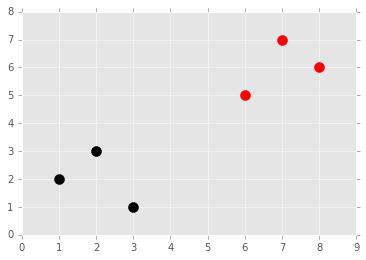

In [24]:
# visualization
dataset = {'k':([[1,2],[2,3],[3,1]]),
           'r':[[6,5],[7,7],[8,6]]}

new_features = [5,7]

[[plt.scatter(ii[0],ii[1],s=100,color = i) for ii in dataset[i]] for i in dataset]
plt.show()

In [29]:
def k_nearest_neighbors(data, predict, k = 3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
    
    distances = []
    for group in data:
        for features in data[group]:
            euclid_distance = np.linalg.norm( np.array(features) - np.array(predict) )
            distances.append([euclid_distance, group])
    
    votes = [ i[1] for i in sorted(distances)[:k] ]
    vote_result = Counter(votes).most_common(1)[0][0]
    return vote_result

In [30]:
result = k_nearest_neighbors(dataset,new_features,3)
print result

r


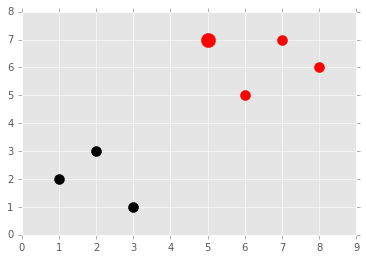

In [32]:
[[plt.scatter(ii[0],ii[1],s=100,color = i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0],new_features[1],s = 200,color = result)
plt.show()

### Testing Results with SK-Learn on WBC

In [133]:
df = pd.read_csv('data/WBC.csv')
df.replace('?', -99999, inplace = True)
df.drop('ID',axis = 1, inplace = True)

full_df = df.astype(float).values.tolist()
print full_df[:6]

[[5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0], [5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0, 2.0], [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0], [6.0, 8.0, 8.0, 1.0, 3.0, 4.0, 3.0, 7.0, 1.0, 2.0], [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0], [8.0, 10.0, 10.0, 8.0, 7.0, 10.0, 9.0, 7.0, 1.0, 4.0]]


In [134]:
random.shuffle(full_df)
print full_df[:6]

[[1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0], [1.0, 1.0, 3.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0], [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0], [1.0, 3.0, 3.0, 2.0, 2.0, 1.0, 7.0, 2.0, 1.0, 2.0], [8.0, 10.0, 10.0, 10.0, 8.0, 10.0, 10.0, 7.0, 3.0, 4.0], [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0]]


In [135]:
test_size = 0.2
train_set = {2:[],4:[]}
test_set = {2:[],4:[]}

train_data = full_df[:-int(test_size * len(full_df))]
test_data = full_df[-int(test_size * len(full_df)):]

for i in train_data:
    train_set[i[-1]].append(i[:-1])
for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [139]:
for group in test_set:
    for data in test_set[group]:
        vote = k_nearest_neighbors(train_set, data, k=5)
        if group == vote:
            correct += 1
        total += 1
print 'Accuracy:', float(correct)/float(total)

Accuracy: 0.948659254415


In [143]:
def k_nearest_neighbors(data, predict, k = 3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
    
    distances = []
    for group in data:
        for features in data[group]:
            euclid_distance = np.linalg.norm( np.array(features) - np.array(predict) )
            distances.append([euclid_distance, group])
    
    votes = [ i[1] for i in sorted(distances)[:k] ]
    vote_result = Counter(votes).most_common(1)[0][0]
    # ADDED: Confidence
    confidence = float(Counter(votes).most_common(1)[0][1]) / float(k)
    return vote_result, confidence

In [152]:
df = pd.read_csv('data/WBC.csv')
df.replace('?', -99999, inplace = True)
df.drop('ID',axis = 1, inplace = True)

full_df = df.astype(float).values.tolist()
print full_df[:6]

random.shuffle(full_df)
print full_df[:6]

test_size = 0.2
train_set = {2:[],4:[]}
test_set = {2:[],4:[]}

train_data = full_df[:-int(test_size * len(full_df))]
test_data = full_df[-int(test_size * len(full_df)):]

for i in train_data:
    train_set[i[-1]].append(i[:-1])
for i in test_data:
    test_set[i[-1]].append(i[:-1])

[[5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0], [5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0, 2.0], [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0], [6.0, 8.0, 8.0, 1.0, 3.0, 4.0, 3.0, 7.0, 1.0, 2.0], [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0], [8.0, 10.0, 10.0, 8.0, 7.0, 10.0, 9.0, 7.0, 1.0, 4.0]]
[[8.0, 2.0, 1.0, 1.0, 5.0, 1.0, 1.0, 1.0, 1.0, 2.0], [4.0, 2.0, 3.0, 5.0, 3.0, 8.0, 7.0, 6.0, 1.0, 4.0], [4.0, 2.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0], [9.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, 3.0, 3.0, 4.0], [3.0, 3.0, 5.0, 2.0, 3.0, 10.0, 7.0, 1.0, 1.0, 4.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0]]


In [153]:
for group in test_set:
    for data in test_set[group]:
        vote,confidence = k_nearest_neighbors(train_set, data, k=5)
        if group == vote:
            correct += 1
        else:
            print confidence
        total += 1
print 'Accuracy:', float(correct)/float(total)

0.8
0.6
0.8
0.8
1.0
Accuracy: 0.953125


In [166]:
accuracies = []

for i in range(25):
    df = pd.read_csv('data/WBC.csv')
    df.replace('?', -99999, inplace = True)
    df.drop('ID',axis = 1, inplace = True)

    full_df = df.astype(float).values.tolist()
    random.shuffle(full_df)

    test_size = 0.2
    train_set = {2:[],4:[]}
    test_set = {2:[],4:[]}

    train_data = full_df[:-int(test_size * len(full_df))]
    test_data = full_df[-int(test_size * len(full_df)):]

    for i in train_data:
        train_set[i[-1]].append(i[:-1])
    for i in test_data:
        test_set[i[-1]].append(i[:-1])
        
    for group in test_set:
        for data in test_set[group]:
            vote,confidence = k_nearest_neighbors(train_set, data, k=5)
            if group == vote:
                correct += 1
            total += 1
    accuracies.append(float(correct)/float(total))
    
print sum(accuracies)/len(accuracies)

0.967006381232


In [164]:
from sklearn import preprocessing, cross_validation, neighbors

In [167]:
accuracies2 = []

for i in range(25): 
    df = pd.read_csv('data/WBC.csv',header=0)
    df.drop('ID',axis = 1, inplace = True)
    # make outliers (also the distance would be crazy hard)
    df.replace('?',-99999, inplace = True)

    X = np.array(df.drop(['class'],axis = 1))
    y = np.array(df['class'])

    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size = 0.2)
    KNN = neighbors.KNeighborsClassifier()
    KNN.fit(X_train, y_train)
    accuracy = KNN.score(X_test,y_test)

    accuracies2.append(accuracy)
    
print sum(accuracies2)/len(accuracies2)

0.970571428571


#### Radius is probably where the SKLearn won, also we can thread to speed things up.

